Existing min, max values : 0 ,  255
Desired min, max values : 50 ,  200


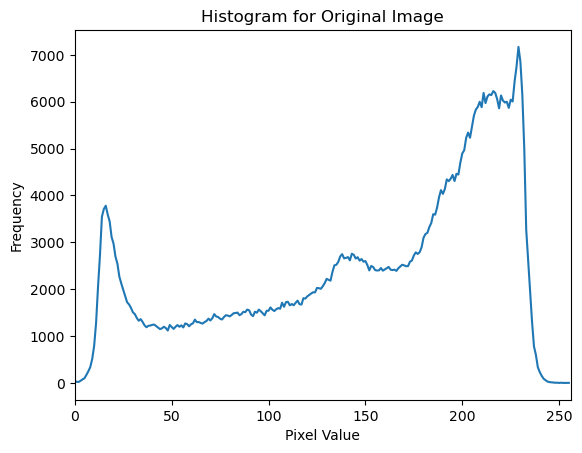

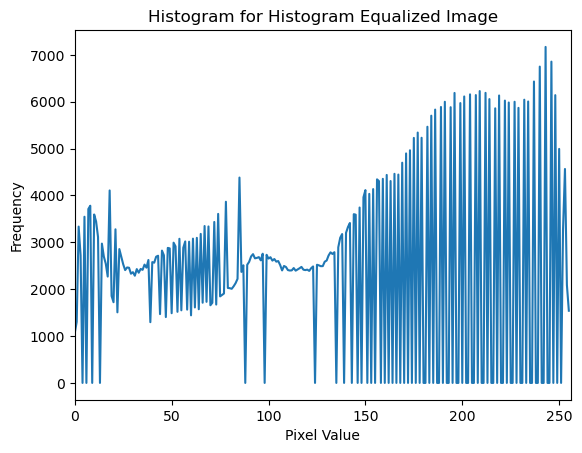

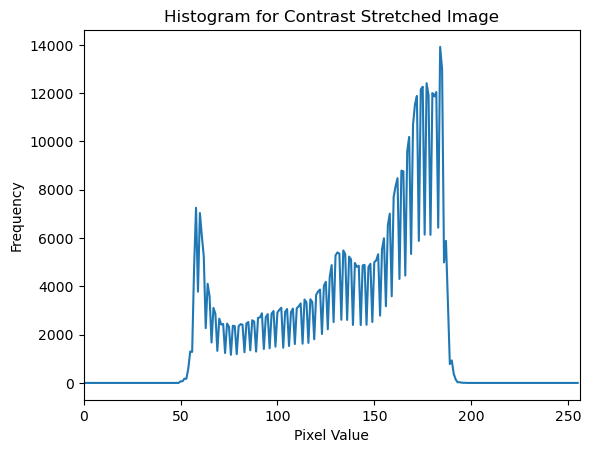

In [ ]:
#histogram equlization and contrast streatching 

import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(image, title):
    """Plot histogram of the given image."""
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.figure()
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.plot(histogram)
    plt.xlim([0, 256])

def histogram_equalization(image):
    """Apply histogram equalization to the given image."""
    return cv2.equalizeHist(image)

def contrast_stretching(image):
    """Apply contrast stretching to the given image."""
    # Compute the minimum and maximum intensity values from the image.
    minval = np.min(image)
    maxval = np.max(image)
    print ('Existing min, max values :', minval, ', ', maxval) 
    dmin = 50
    dmax = 200
    print ('Desired min, max values :', dmin, ', ', dmax) 
    # Apply contrast stretching.
#     stretched_image = (image - minval) * (255 / (maxval - minval))
    dgap = dmax-dmin
    stretched_image = dmin+(image - minval) * (dgap / (maxval - minval))
#     stretched_image = dmin + (((image - minval) * (dmax- dmin)) / (maxval - minval))
    return stretched_image.astype(np.uint8)

# Load the image in grayscale
image_path = 'Day14.jpeg'  # Update this path
original_image = cv2.imread('Day14.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = histogram_equalization(original_image)

# Apply contrast stretching
stretched_image = contrast_stretching(original_image)

# Plotting the results
cv2.imshow("Original Image", original_image)
cv2.imshow("Histogram Equalized Image", equalized_image)
cv2.imshow("Contrast Stretched Image", stretched_image)

# Plot histograms
plot_histogram(original_image, "Histogram for Original Image")
plot_histogram(equalized_image, "Histogram for Histogram Equalized Image")
plot_histogram(stretched_image, "Histogram for Contrast Stretched Image")

plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()
